# Lending Club Prediction

Here are what the columns represent:

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Useful Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import shap
import warnings #optional
warnings.filterwarnings('ignore')

In [3]:
# create a dataframe
df = pd.read_csv('loan_data.csv')

# first 5 records of the dataframe
df.head(5)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
# last 5 records of the dataframe
df.tail(5)

credit.policy             purpose  int.rate  installment  \
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1

# Data Preprocessing

In [5]:
# complete information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
# stats behind the dataset
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [7]:
# columns present in the dataset
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
# data types of all the columns present in the dataframe
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [9]:
# number of missing values in the dataframe
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Exploratory Data Analysis (EDA)

<Figure size 2000x2000 with 0 Axes>

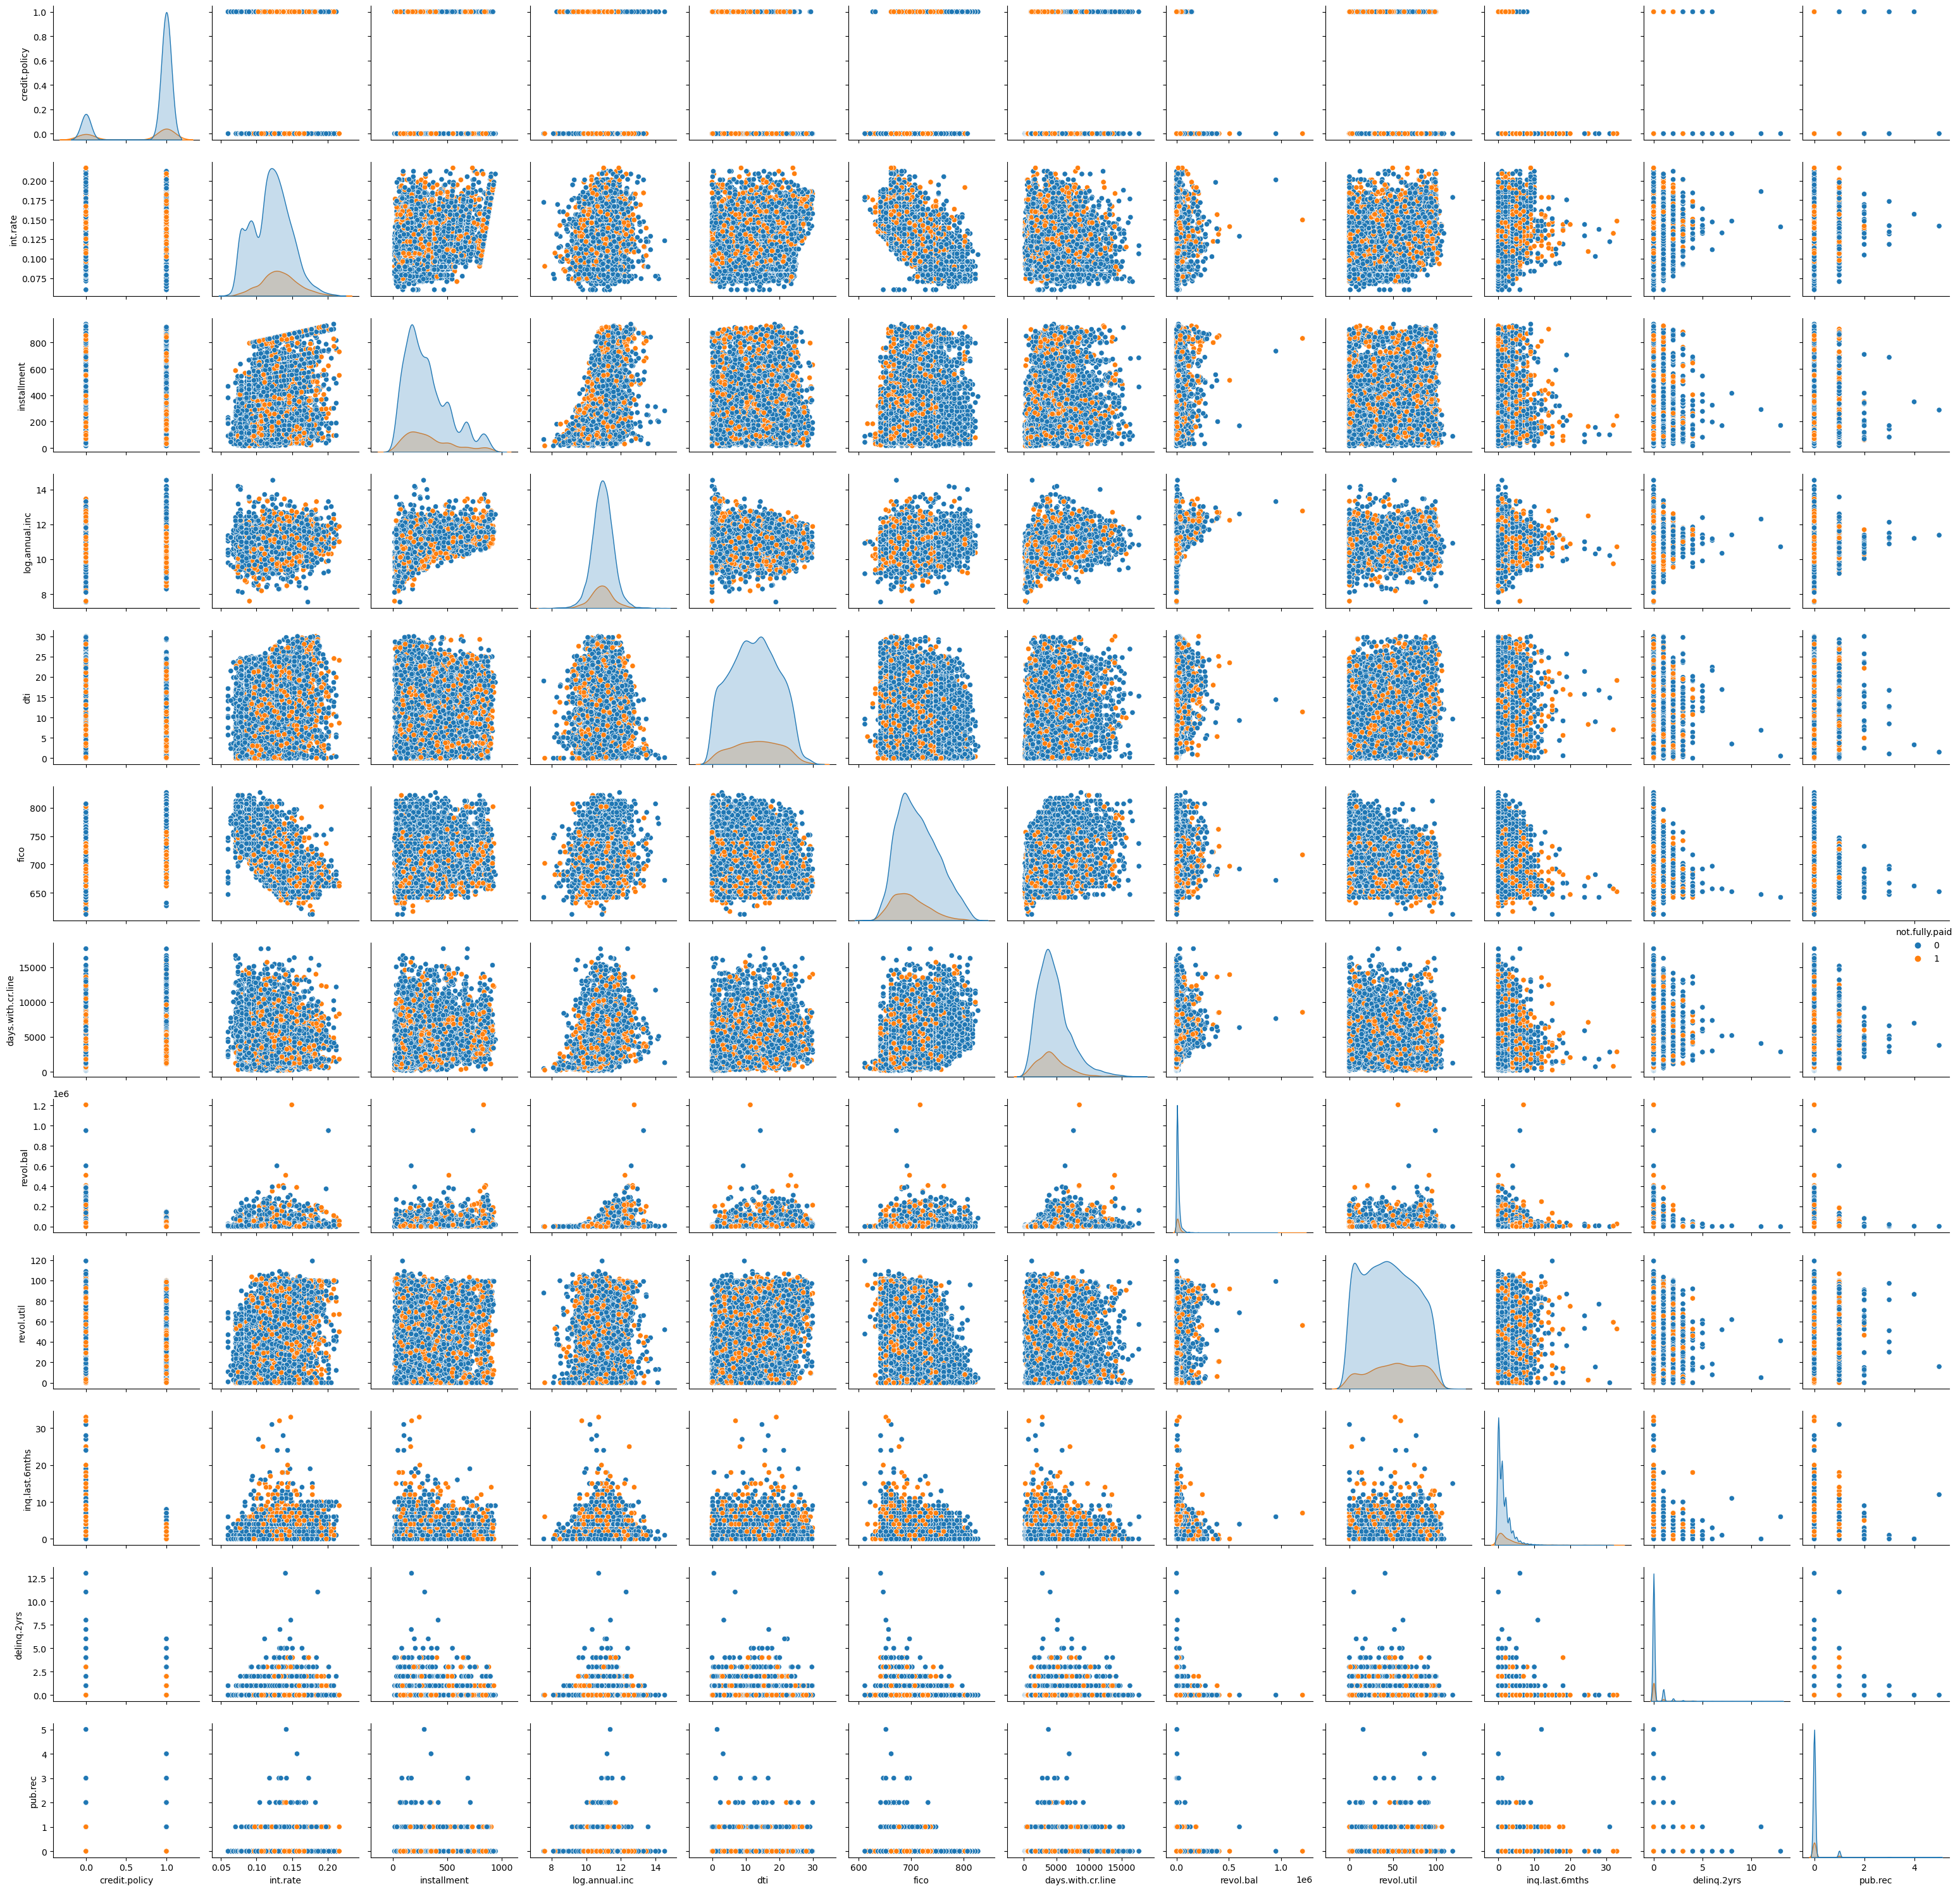

In [10]:
# A complete scatter plot between all the features

# adjust the figure size
plt.figure(figsize=(20,20))

# make a pairplot for whole dataset
sns.pairplot(data=df,hue='not.fully.paid')

# adjust a tight and well gaped layout
plt.tight_layout()

# 1. Univariant Data Analysis

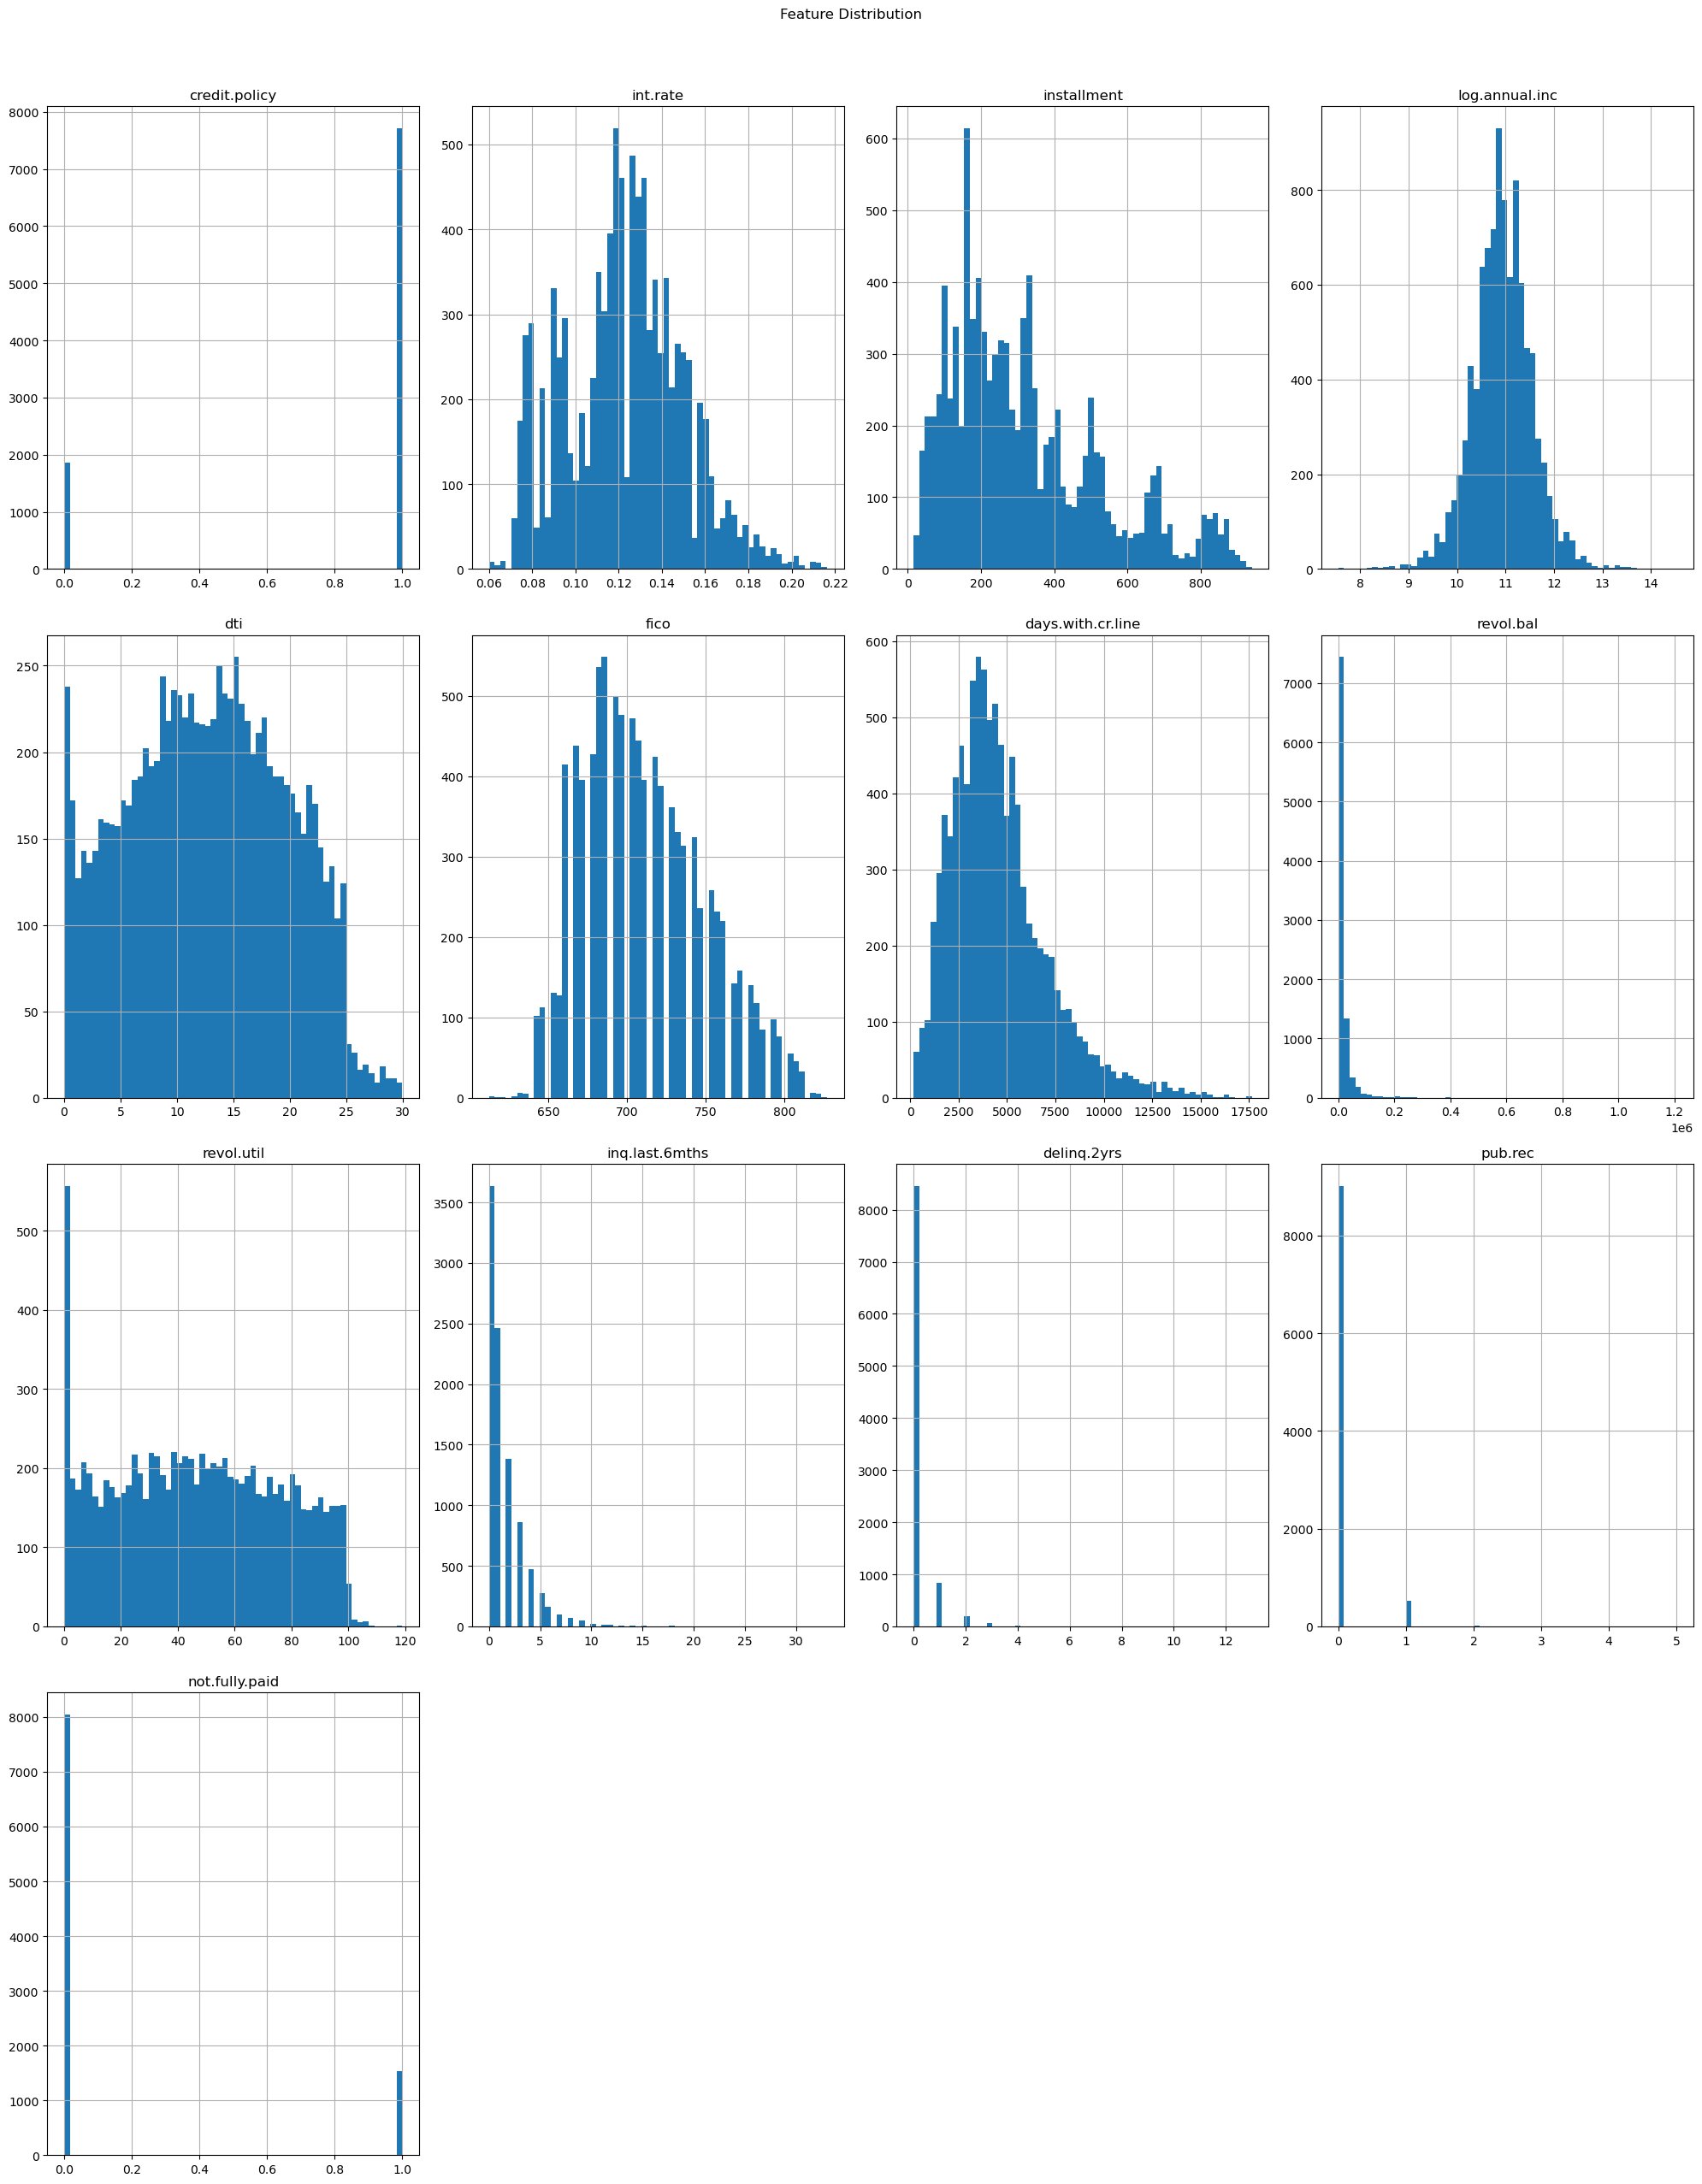

In [11]:
# feature distribution 
df.hist(bins=60,figsize=(20,25))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')
plt.tight_layout()

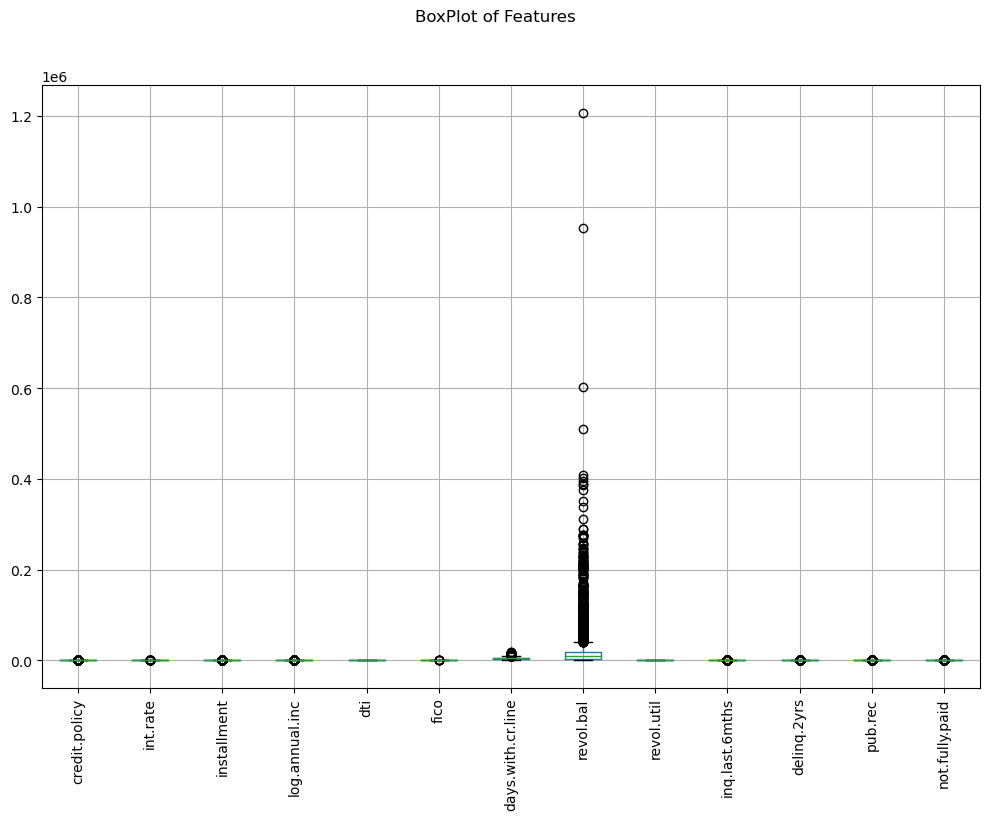

In [12]:
# boxplot for all the features
df.boxplot(figsize=(10,8))
plt.suptitle('BoxPlot of Features',x=0.5,y=1.02,ha='center',fontsize='large')
plt.xticks(rotation=90)
plt.tight_layout()

# 2. Bivariant Data Analysis 

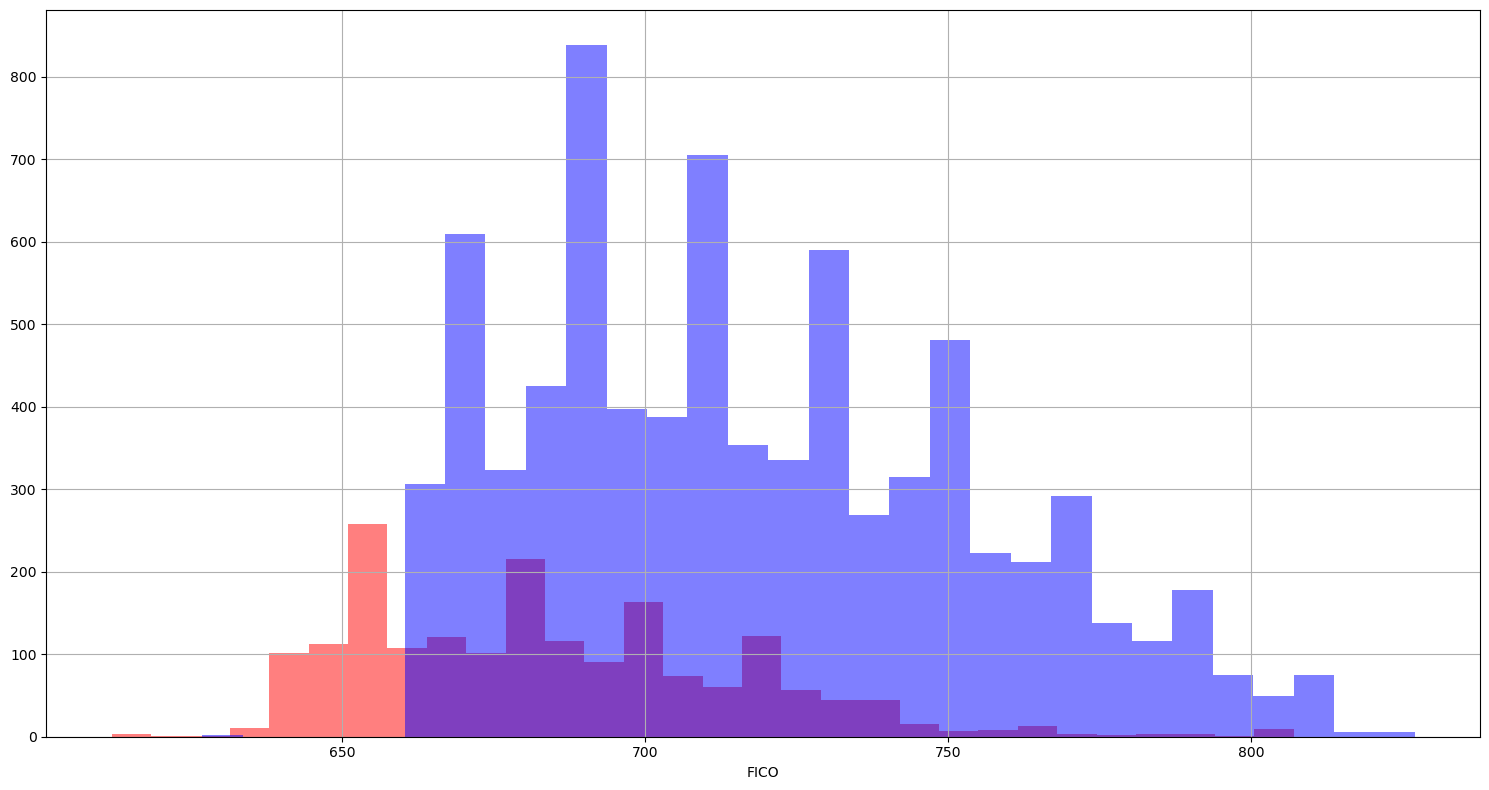

In [13]:
# adjust size of the plot
plt.figure(figsize=(15,8))

# number of fico w.r.t credit policy
df[df['credit.policy'] == 0]['fico'].hist(bins=30,color='red',label='Credit Policy = 0',alpha=0.5)
df[df['credit.policy'] == 1]['fico'].hist(bins=30,color='blue',label='Credit Policy = 1',alpha=0.5)
plt.xlabel('FICO') # x axis label
plt.tight_layout()

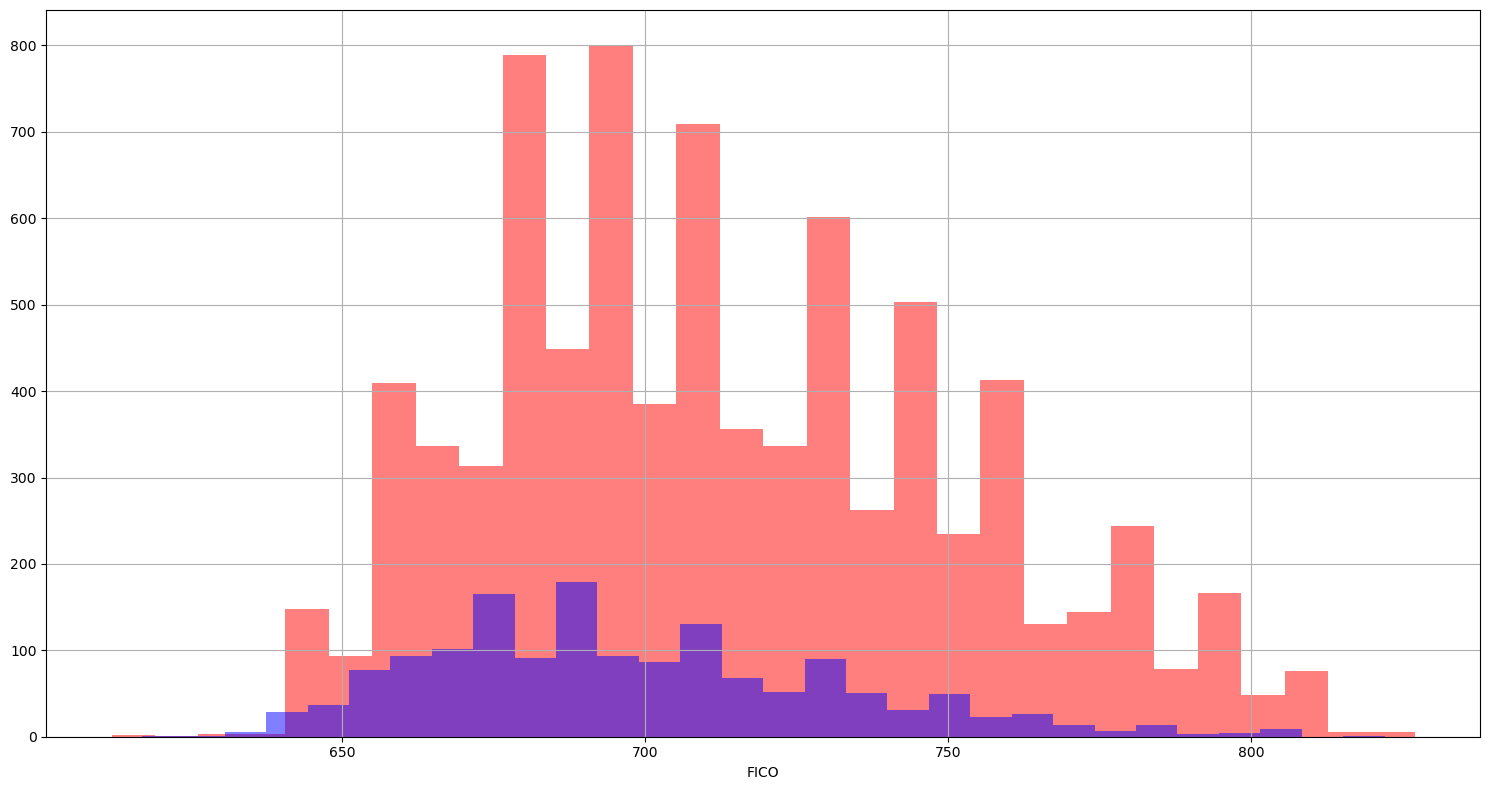

In [14]:
# adjust size of the plot
plt.figure(figsize=(15,8))

# number of fico w.r.t not fully paid
df[df['not.fully.paid'] == 0]['fico'].hist(bins=30,alpha=0.5,label='Not Fully Paid = 0',color='red')
df[df['not.fully.paid'] == 1]['fico'].hist(bins=30,alpha=0.5,label='Not Fully Paid = 1',color='blue')
plt.xlabel('FICO') # x axis label
plt.tight_layout()

Text(0.5, 0, 'The number of days the borrower has had a credit line')

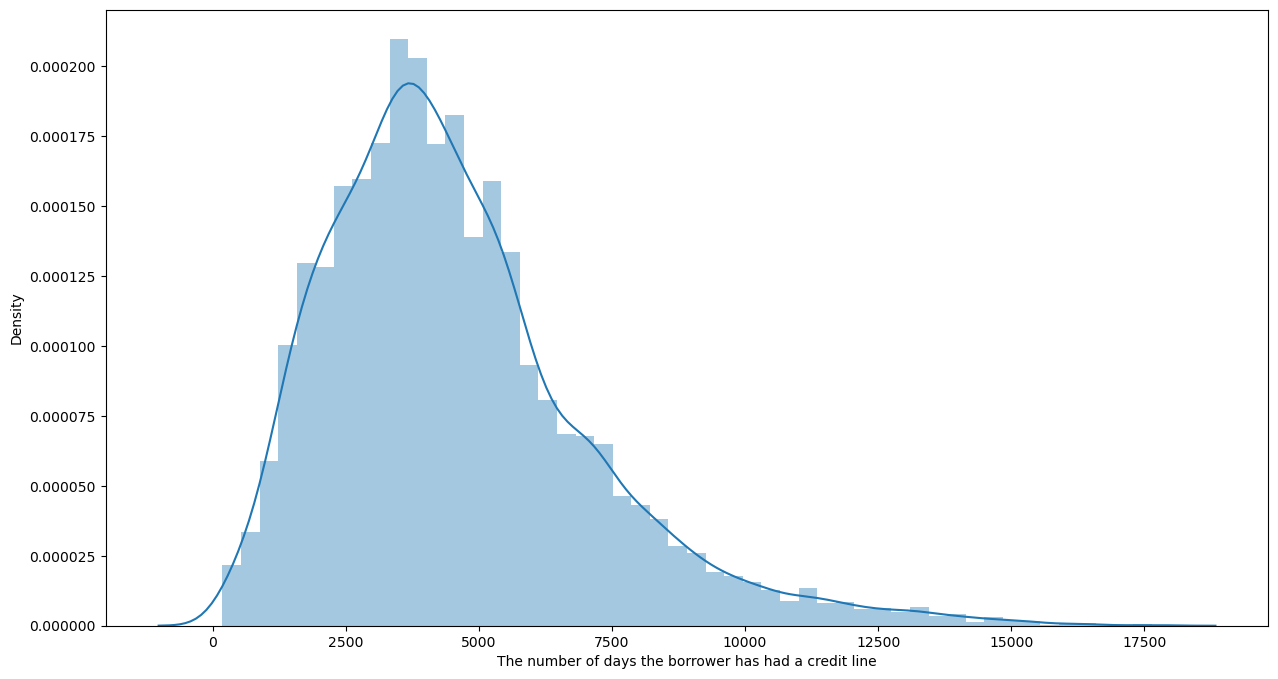

In [15]:
# adjust the plot
plt.figure(figsize=(15,8))

# check the density of the number of days the borrower has had a credit line
sns.distplot(x=df['days.with.cr.line'],kde=True,hist=True)
plt.xlabel('The number of days the borrower has had a credit line')

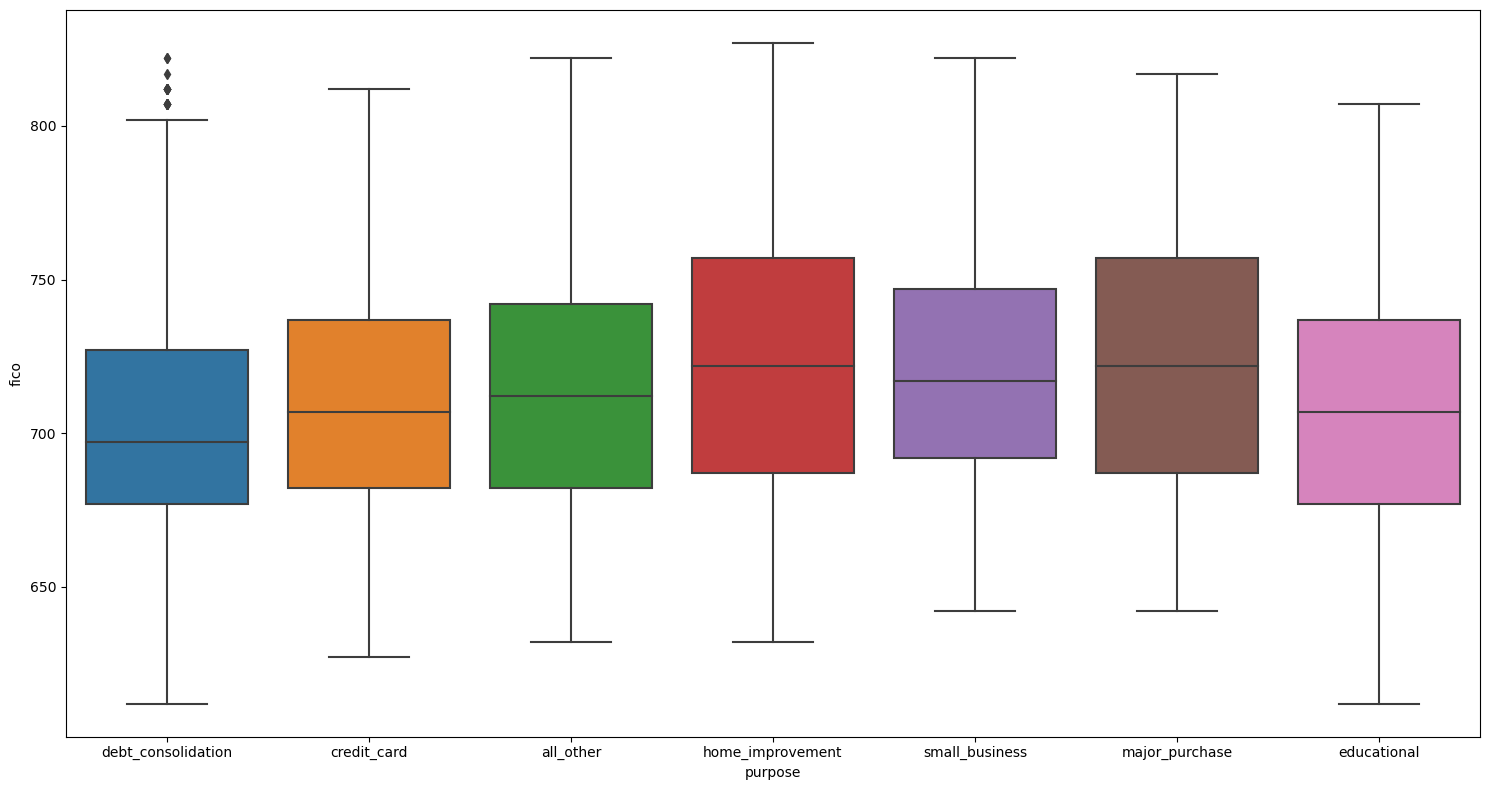

In [16]:
# adjust the size of the plot
plt.figure(figsize=(15,8))

# create a boxplot of different purpose w.r.t fico
sns.boxplot(x='purpose',y='fico',data=df)

# fit the plot
plt.tight_layout()

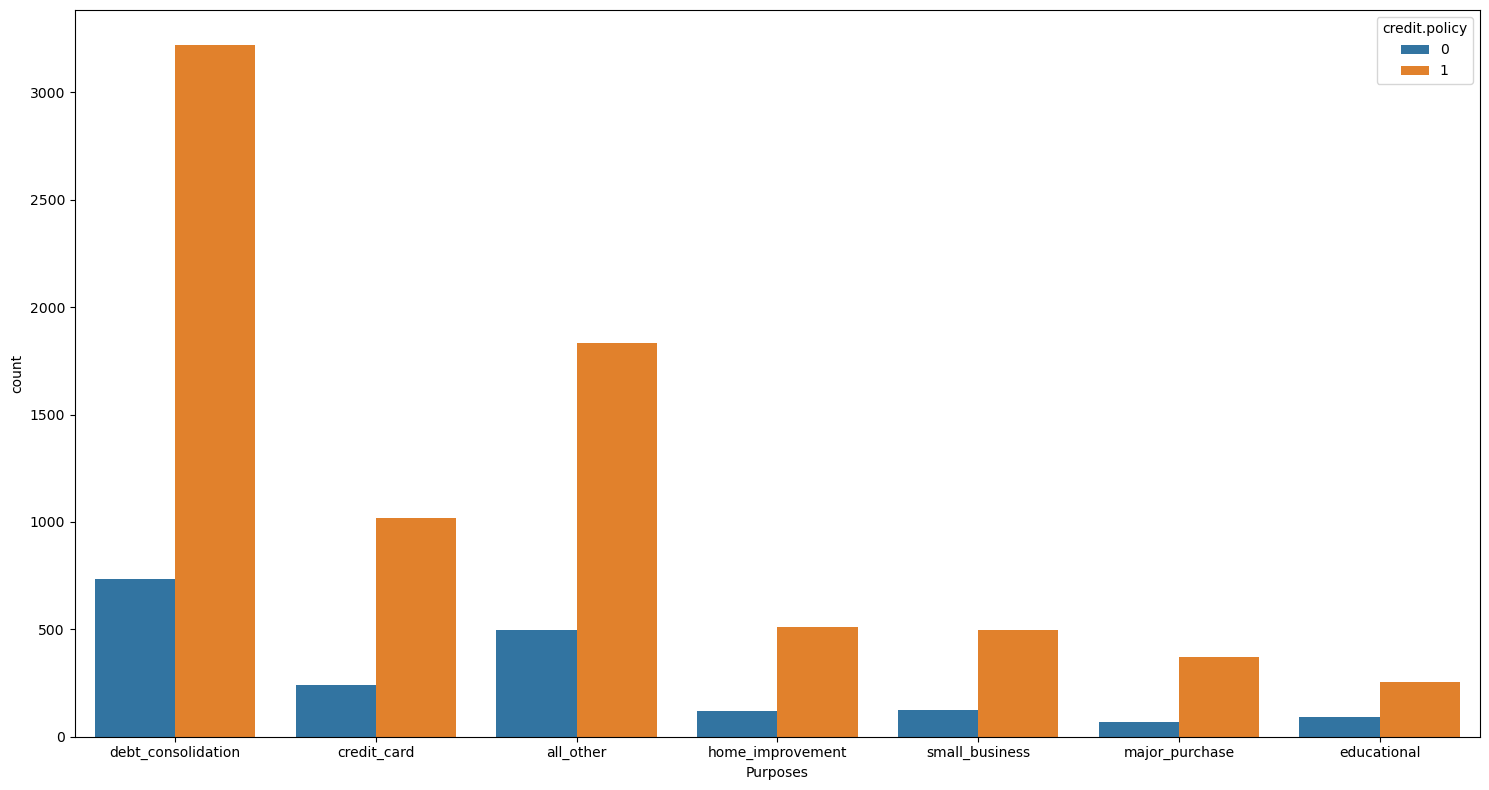

In [17]:
# adjust the size of the plot
plt.figure(figsize=(15,8))

# countplot for different purpose
sns.countplot(data=df,x='purpose',hue='credit.policy')
plt.xlabel('Purposes')

plt.tight_layout()

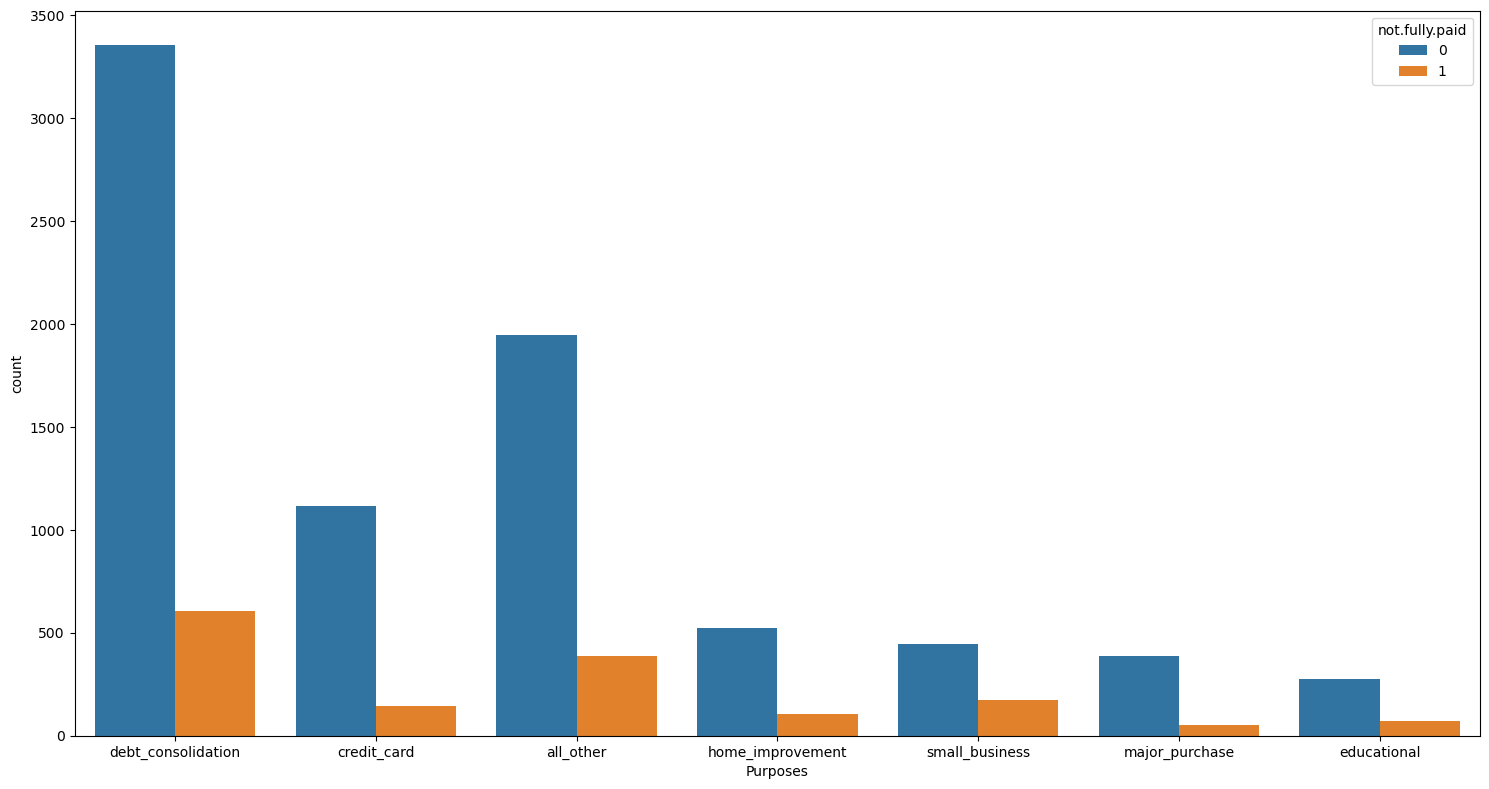

In [18]:
# adjust the size of the plot
plt.figure(figsize=(15,8))

# countplot for different purpose
sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xlabel('Purposes')

plt.tight_layout()

<Figure size 800x700 with 0 Axes>

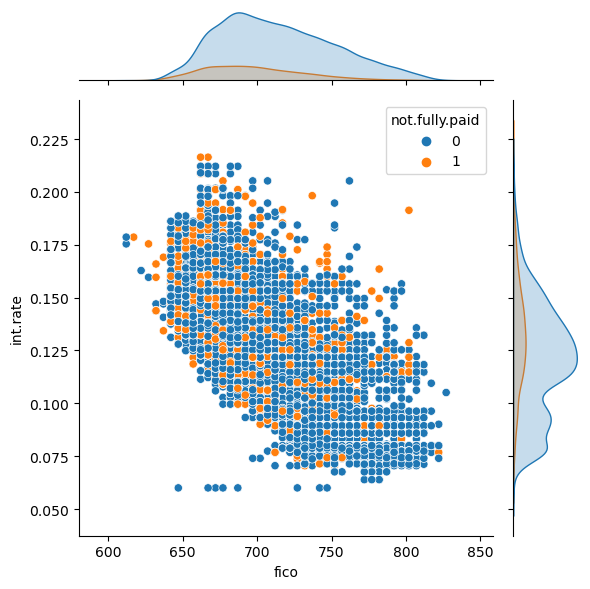

In [19]:
# adjust the size of the plot
plt.figure(figsize=(8,7))

# scatter plot for fico vs interest rate (in decimals)
sns.jointplot(data=df,x='fico',y='int.rate',hue='not.fully.paid')

plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

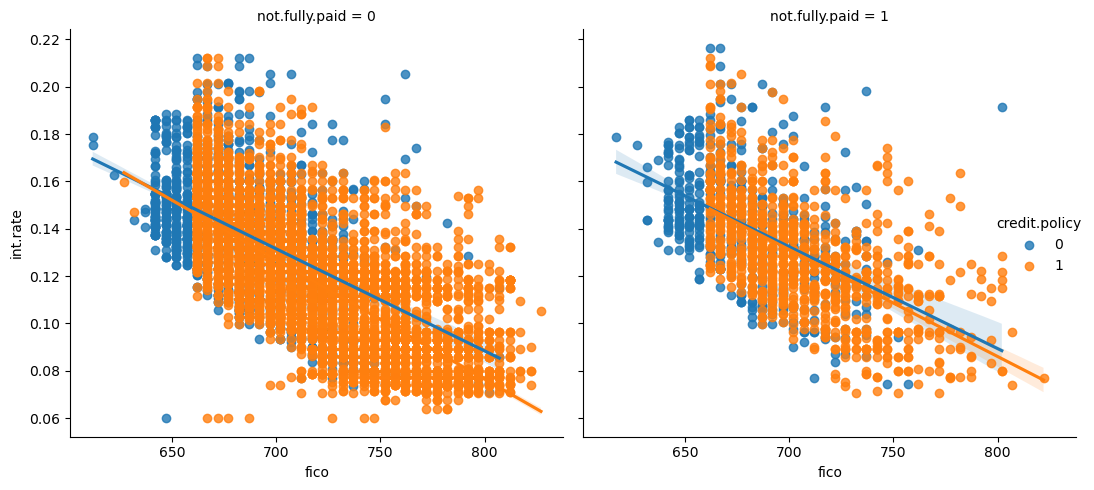

In [20]:
# adjust the size of the plot
plt.figure(figsize=(15,8))

sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid')

plt.tight_layout()

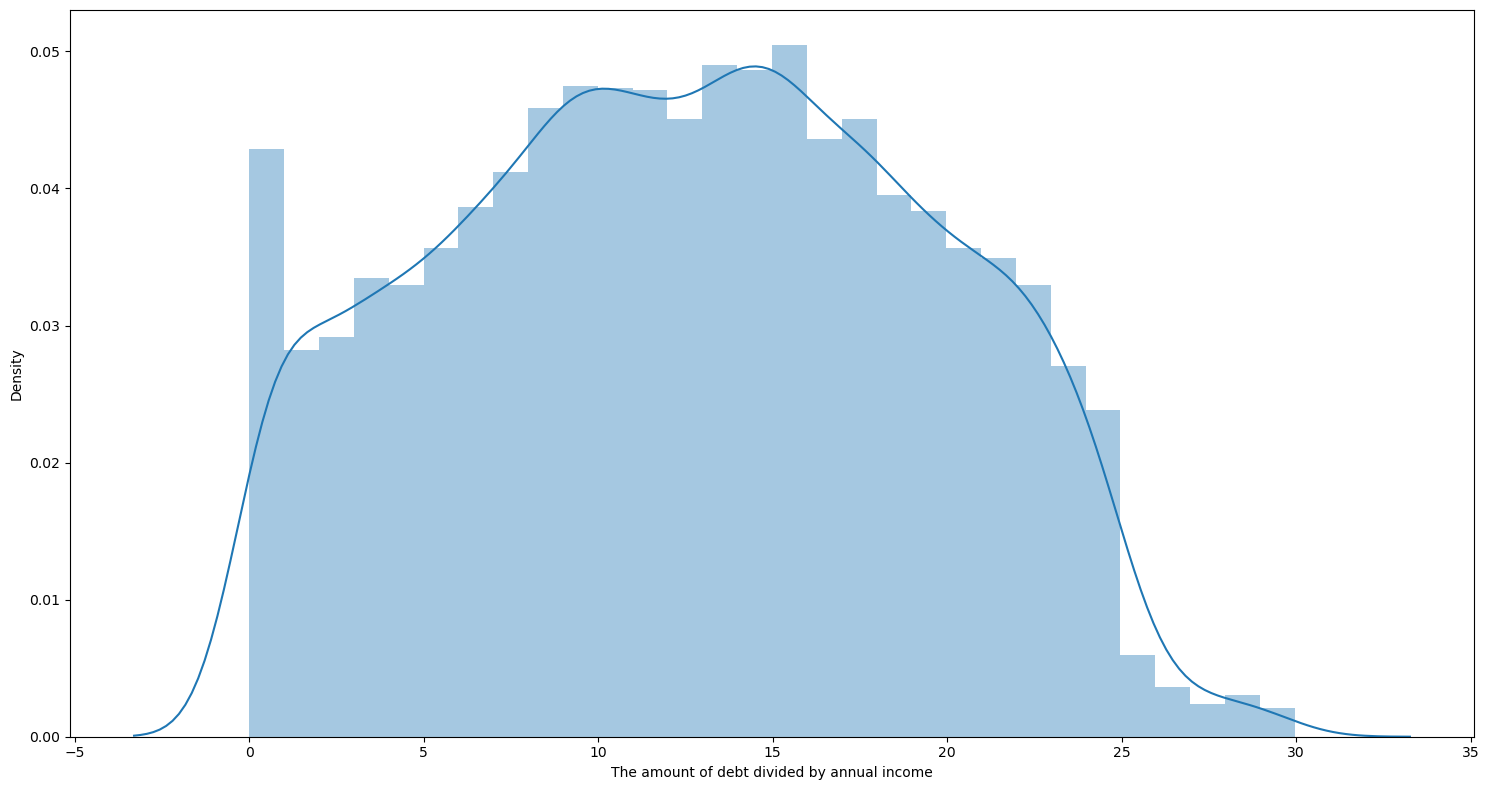

In [21]:
# adjust the plot
plt.figure(figsize=(15,8))

# check the density of the amount of debt divided by annual income
sns.distplot(x=df['dti'],kde=True,hist=True)
plt.xlabel('The amount of debt divided by annual income')

plt.tight_layout()

In [22]:
# correlation between features of dataset
df.corr()

credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0.158119  0.159552     0.049955       -0.033439   

                        dti      fico  days.with.cr.line  revol.bal  \
credit.policy     -0.090901  0.348319           0.099026  -0.187518   
int.rate           0.220006 -0.714821          -0.124022   0.092527   
installment        0.050202  0.086039           0.183297   0.233625   
log.annual.inc    -0.054065  0.114576           0.336896   0.372140   
dti                1.000000 -0.241191           0.060101   0.188748   
fico              -0.241191  1.000000           0.263880  -0.015553   
days.with.cr.line  0.060101  0.263880           1.000000   0.229344   
revol.bal          0.188748 -0.015553           0.229344   1.000000   
revol.util         0.337109 -0.541289          -0.024239   0.203779   
inq.last.6mths     0.029189 -0.185293          -0.041736   0.022394   
delinq.2yrs       -0.021792 -0.216340           0.081374  -0.033243   
pub.rec            0.006209 -0.147592           0.071826  -0.031010   
not.fully.paid     0.037362 -0.149666          -0.029237   0.053699   

                   revol.util  inq.last.6mths  delinq.2yrs   pub.rec  \
credit.policy       -0.104095       -0.535511    -0.076318 -0.054243   
int.rate             0.464837        0.202780     0.156079  0.098162   
installment          0.081356       -0.010419    -0.004368 -0.032760   
log.annual.inc       0.054881        0.029171     0.029203  0.016506   
dti                  0.337109        0.029189    -0.021792  0.006209   
fico                -0.541289       -0.185293    -0.216340 -0.147592   
days.with.cr.line   -0.024239       -0.041736     0.081374  0.071826   
revol.bal            0.203779        0.022394    -0.033243 -0.031010   
revol.util           1.000000       -0.013880    -0.042740  0.066717   
inq.last.6mths      -0.013880        1.000000     0.021245  0.072673   
delinq.2yrs         -0.042740        0.021245     1.000000  0.009184   
pub.rec              0.066717        0.072673     0.009184  1.000000   
not.fully.paid       0.082088        0.149452     0.008881  0.048634   

                   not.fully.paid  
credit.policy           -0.158119  
int.rate                 0.159552  
installment              0.049955  
log.annual.inc          -0.033439  
dti                      0.037362  
fico                    -0.149666  
days.with.cr.line       -0.029237  
revol.bal                0.053699  
revol.util               0.082088  
inq.last.6mths           0.149452  
delinq.2yrs              0.008881  
pub.rec                  0.048634  
not.fully.paid           1.000000

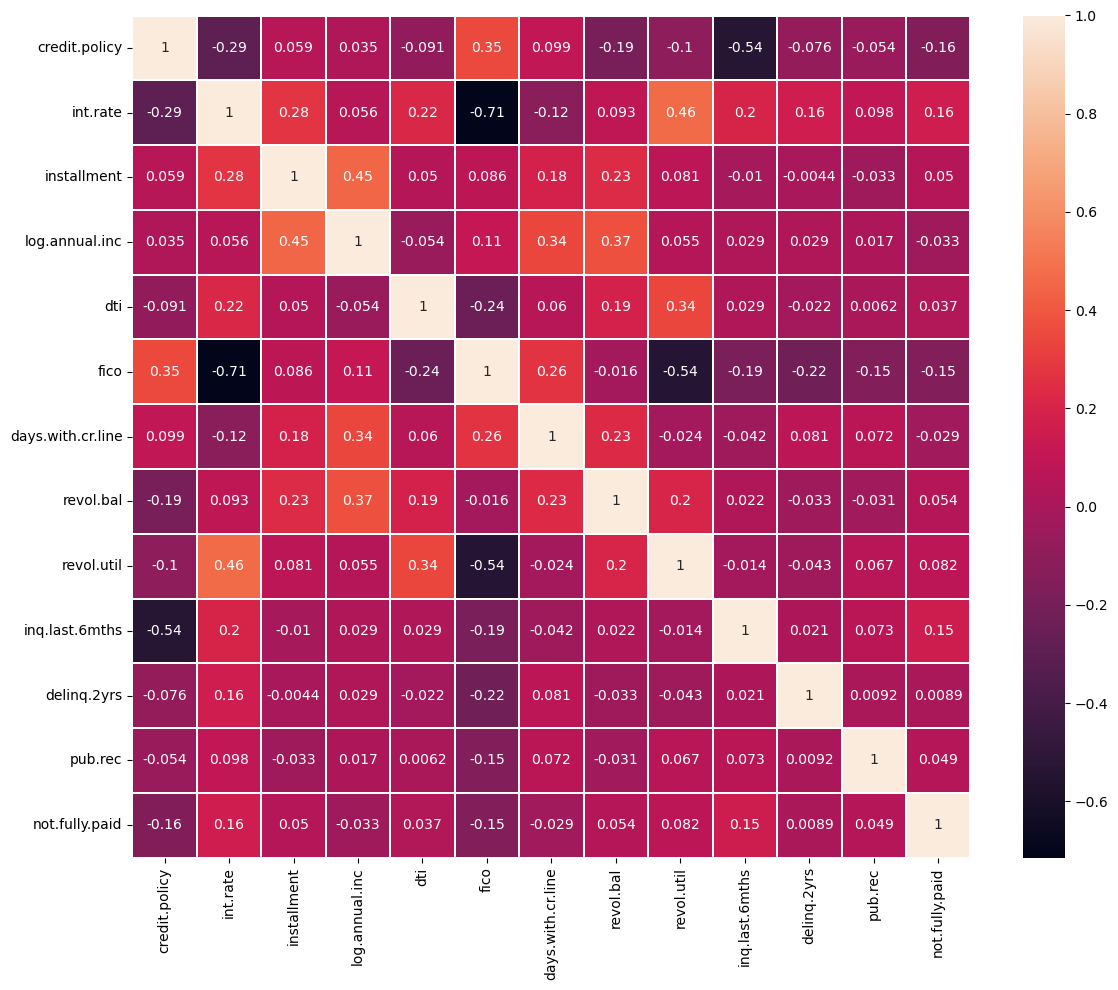

In [23]:
# adjust size for the heatmap
plt.figure(figsize=(12,10))

# create a heatmap for all features (expect purpose)
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.2)

plt.tight_layout()

It seem like all the features are not much correlated with each other.

# Hot Encoding

Purpose column has object data type and we know very well that machine learning model doesn't work for categorical or object data type. So, we need to convert object data type into numerical form and after that we will able to train and test our machine learning model.

In [24]:
purpose_col = ['purpose']

df_final = pd.get_dummies(data=df,columns=purpose_col,drop_first=True)

In [25]:
df_final.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

Hence, our previous 'purpose' column is removed from our dataframe and six new purpose columns is added which show different purposes.

# Machine Learning Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# scaling the dataset
scaler = StandardScaler()
scaler.fit(df_final.drop('not.fully.paid',axis=1))

StandardScaler()

In [28]:
# transform the data in scaler instance
scaler_feature = scaler.transform(df_final.drop('not.fully.paid',axis=1))

In [29]:
# make a final scaled dataframe which is going to use for our model
columns = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti','fico', 'days.with.cr.line', 'revol.bal',
           'revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec','purpose_credit_card', 'purpose_debt_consolidation',
           'purpose_educational', 'purpose_home_improvement','purpose_major_purchase', 'purpose_small_business']
df_scale = pd.DataFrame(scaler_feature,columns=columns)
df_scale.head()

credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0       0.492222 -0.139318     2.463099        0.680388  0.998505  0.688825   
1       0.492222 -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2       0.492222  0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3       0.492222 -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4       0.492222  0.743509    -1.043992        0.597961  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.432230   0.353732    0.182704       -0.716989    -0.299730   
1          -0.721230   0.495018    1.030602       -0.716989    -0.299730   
2           0.059770  -0.397073   -0.730683       -0.262470    -0.299730   
3          -0.745277   0.496321    0.909966       -0.262470    -0.299730   
4          -0.198161  -0.360663   -0.251586       -0.716989     1.531147   

    pub.rec  purpose_credit_card  purpose_debt_consolidation  \
0 -0.237003            -0.389558                    1.191856   
1 -0.237003             2.567010                   -0.839028   
2 -0.237003            -0.389558                    1.191856   
3 -0.237003            -0.389558                    1.191856   
4 -0.237003             2.567010                   -0.839028   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0            -0.192721                 -0.265117               -0.218647   
1            -0.192721                 -0.265117               -0.218647   
2            -0.192721                 -0.265117               -0.218647   
3            -0.192721                 -0.265117               -0.218647   
4            -0.192721                 -0.265117               -0.218647   

   purpose_small_business  
0               -0.262855  
1               -0.262855  
2               -0.262855  
3               -0.262855  
4               -0.262855

In [30]:
# splite the training features and target variable
X = df_scale
y = df_final['not.fully.paid']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# make an instance for all ml algorithms
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
svm = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
# make a list for all ml instances
ml_algo = [lr,dtree,rfc,svm,knn]

# find the MSE of all the algorithms and seleted top three algo. with least MSE. 
for i in ml_algo:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print(i,'MSE: {:.4f}'.format(mean_squared_error(y_test,pred)),'\n')

LogisticRegression() MSE: 0.1618 

DecisionTreeClassifier() MSE: 0.2717 

RandomForestClassifier(n_estimators=200) MSE: 0.1625 

SVC(probability=True) MSE: 0.1618 

KNeighborsClassifier() MSE: 0.1771 



Hence, Top three algorithms with least mean squared error:
1. Logistic Regression       = 0.1618
2. Random Forest Classifier  = 0.1625
3. Support Vector Classifier = 0.1618

# Logistic Regression

In [35]:
# fitting the data and make a model with logistic regression ml algo.
lr.fit(X_train,y_train)

# predict the test data
lr_pred = lr.predict(X_test)

In [36]:
# check confusion matrix, classification report and accuracy score of predicted valu
cm = confusion_matrix(y_test,lr_pred)
print(cm,'\n')
print(classification_report(y_test,lr_pred),'\n')
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,lr_pred)*100))

[[2394   14]
 [ 451   15]] 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.79      0.84      0.77      2874
 

Accuracy Score: 83.82%


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

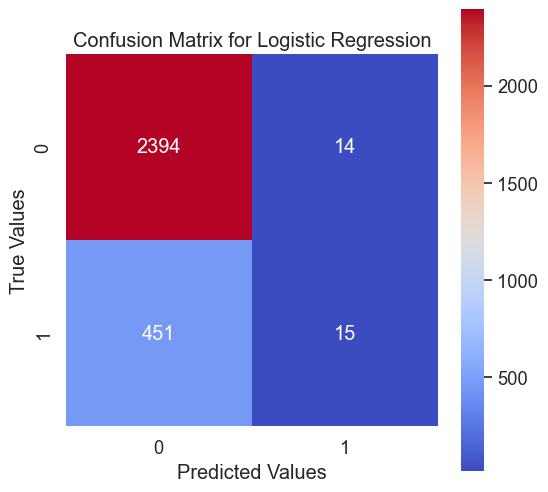

In [37]:
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])
plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Logistic Regression') # title of the confusion matrix

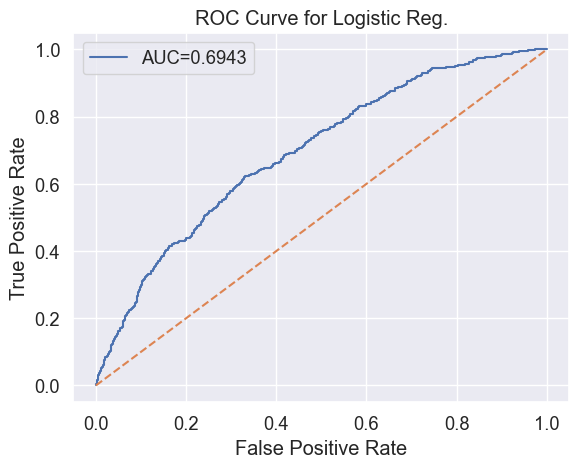

In [38]:
# create a ROC Curve and AUC plot to assess the overall diagnostic performance of a test and to compare the performance of
# two or more diagnostic tests.

lr_pred_prob = lr.predict_proba(X_test)[:][:,1]

lr_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(lr_pred_prob,columns=['y pred prob'])],axis=1)
lr_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])
auc = roc_auc_score(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Reg.')
plt.legend()

# Random Forest

In [39]:
# fitting data and make a model from random forest ml algo
rfc.fit(X_train,y_train)

# predict the test data
rfc_pred = rfc.predict(X_test)

In [40]:
# check confusion matrix, classification report and accuracy score of predicted values
cm = confusion_matrix(y_test,rfc_pred)
print(cm,'\n')
print(classification_report(y_test,rfc_pred),'\n')
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,rfc_pred)*100))

[[2399    9]
 [ 461    5]] 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.36      0.01      0.02       466

    accuracy                           0.84      2874
   macro avg       0.60      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874
 

Accuracy Score: 83.65%


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

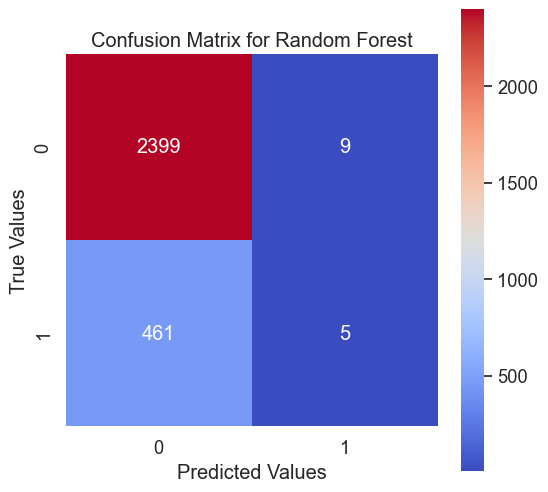

In [41]:
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])
plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Random Forest') # title of the confusion matrix

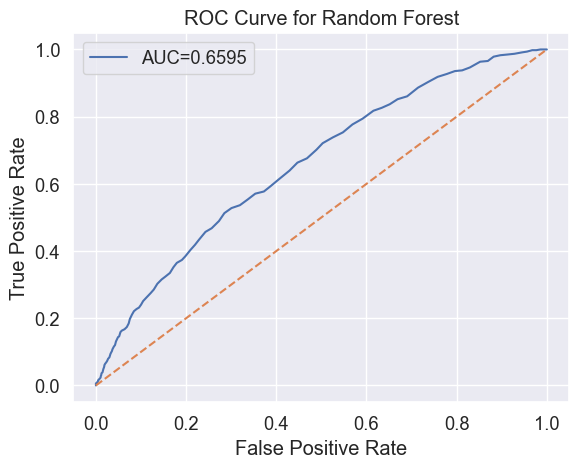

In [42]:
# ROC and AUC for the random forest model
rfc_pred_prob = rfc.predict_proba(X_test)[:][:,1]

rfc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(rfc_pred_prob,columns=['y pred prob'])],axis=1)
rfc_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])
auc = roc_auc_score(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()

# Support Vector Machine (SVM)

In [43]:
# fitting data and make a model from svm ml algo.
svm.fit(X_train,y_train)

# predict the test data
svm_pred = svm.predict(X_test)

In [45]:
# check confusion matrix, classification report and accuracy score of predicted values
cm = confusion_matrix(y_test,svm_pred)
print(cm,'\n')
print(classification_report(y_test,svm_pred),'\n')
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,svm_pred)*100))

[[2407    1]
 [ 464    2]] 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.67      0.00      0.01       466

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.46      2874
weighted avg       0.81      0.84      0.77      2874
 

Accuracy Score: 83.82%


Text(0.5, 1.0, 'Confusion Matrix for SVM')

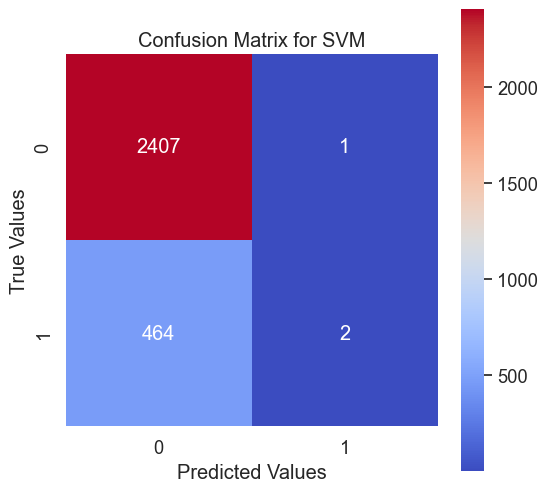

In [46]:
# adjust the size of the confusion matrix 
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the SVM model
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for SVM') # title of the confusion matrix

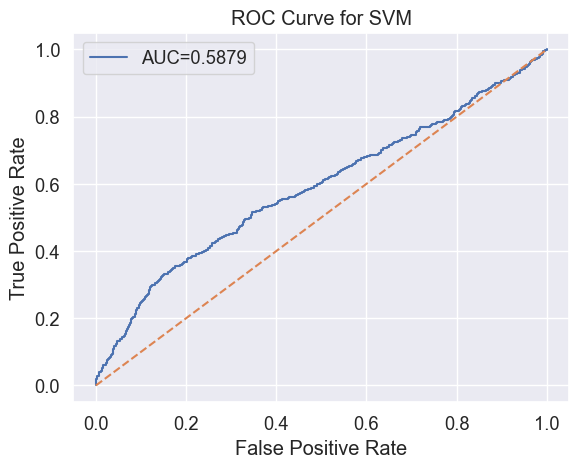

In [47]:
# ROC and AUC for the SVM model
svm_pred_prob = svm.predict_proba(X_test)[:][:,1]

svm_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(svm_pred_prob,columns=['y pred prob'])],axis=1)
svm_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])
auc = roc_auc_score(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()

# Hyperparameter Tuning

In [49]:
# hyperparameter tuning for Logistic Regression Model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'max_iter': [100, 200, 300]
}

# hyperparameter tuning for Random Forest Model
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# hyperparameter tuning for SVM Model
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma':[0.001, 0.01, 0.1, 1]
}

In [55]:
#Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train,y_train)

print('Best Hyperparameters for Logistic Regression Model:',grid_search_lr.best_params_)

#Get the best model
best_lr_model = grid_search_lr.best_estimator_

# Make predictions with the best model
y_lr_pred = best_lr_model.predict(X_test)

#confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_lr_pred),'\n')
print(classification_report(y_test,y_lr_pred),'\n')
print('Accuracy score of best model: {}%'.format(accuracy_score(y_test,y_lr_pred)*100))

Best Hyperparameters for Logistic Regression Model: {'C': 0.01, 'max_iter': 100}
[[2397   11]
 [ 457    9]] 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.45      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874
 

Accuracy score of best model: 83.7160751565762%


In [53]:
#Random Forest
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, scoring='accuracy')
grid_search_rfc.fit(X_train,y_train)

print('Best Hyperparameters for Random Forest Model:',grid_search_rfc.best_params_)

# Get the best model
best_rfc_model = grid_search_rfc.best_estimator_

# Make predictions with the best model
y_rfc_pred = best_rfc_model.predict(X_test)

#confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_rfc_pred),'\n')
print(classification_report(y_test,y_rfc_pred),'\n')
print('Accuracy score of best model: {}%'.format(accuracy_score(y_test,y_rfc_pred)*100))

Best Hyperparameters for Random Forest Model: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
[[2404    4]
 [ 462    4]] 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.50      0.01      0.02       466

    accuracy                           0.84      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.78      0.84      0.77      2874
 

Accuracy score of best model: 83.785664578984%


In [56]:
#Support Vector Machine (SVM)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train,y_train)

print('Best Hyperparameters for Random Forest Model:',grid_search_svm.best_params_)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Make predictions with the best model
y_svm_pred = best_svm_model.predict(X_test)

#confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_svm_pred),'\n')
print(classification_report(y_test,y_svm_pred),'\n')
print('Accuracy score of best model: {}%'.format(accuracy_score(y_test,y_svm_pred)*100))

Best Hyperparameters for Random Forest Model: {'C': 0.1, 'gamma': 0.001}
[[2408    0]
 [ 466    0]] 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874
 

Accuracy score of best model: 83.785664578984%


# Comparison of Accuracy Score Before and After Hyperparameter Tuning

            Model                  Accuracy Score (Before Hyper. Tuning)       AccuracyScore (After Hyper. Tuning)
       1. Logistic Reg.            83.82%                                      83.71%
       2. Random Forest            83.65%                                      83.78%
       3. SVM                      83.82%                                      83.78%

So, As we able to see that, hyperparameter tuning doesn't effect well in our models like:- except Random Forest, other models accuracy decrease (but, very less). Random Forest accuracy increase slightly (0.13%) which is not enough but, they do not reduce the accuracy, that is good for us.  

# Conclusion

Now, if we have to conclude that which model is good for our dataset or problem then, it is difficult to conclude because all three models work well. But, we also have to focus on precision, recall and f1-score because if we observe classification report and confusion matrix then, we got error of type I and type II. 

Hence, we conclude that our models is not much good for the prediction. We have to do some more work on our models to make best predictions for our future data.